# Maximizing Long Term Profit and Average Sustainable Catch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc

In [2]:
g = 0.25
k = 30
q = 0.025
p = 10
d = 0.2
x0 = 2
c = 2

beta = c/(p * q * k)

## Maximizing Sustainable Catch

In [6]:
def avg_catch(b):
    return q * b * k * (1 - q * b / g)

max_catch = g / (2 * q)
print('Boats for max catch: ' + str(max_catch))

Boats for max catch: 5.0


## Maximizing Long Term Profit
As shown below, maximizing long term profit results in about 5.36 boats. Since we cannot have a fraction of a boat, this can be rounded down to 5. The value outputted by the Scipy optimization function roughly matches that of the equation for $b^*$ as described in the text. This can be seen below.

In [9]:
b_max = g/q * (1 - c/(p * q * k))

b0 = np.arange(1,b_max,0.1)

def profit(b):
    t = 1/g * (np.log(k/x0 - 1) + np.log(g/(q * b) - 1))
    return b/d * (p * q * k * (1 - (q*b)/g) - c) * np.exp(-d * t)

# Use Scipy to calculate maximum long term profit
b_opt = sc.fmin(lambda x: -profit(x), 0)

# Calculate manually using the function as described in the text
b_opt_man = g/(4*q) * (3 - beta + d/g - np.sqrt((1 + beta - d/g) ** 2 + 8 * beta * d/g))

print('Scipy: ' + str(b_opt[0]) + ' Max equation: ' + str(b_opt_man))

# Calculate maximum amount of boats for average long term catch
print(sc.fmin(lambda x: -avg_catch(x), 0))


Optimization terminated successfully.
         Current function value: -5.390303
         Iterations: 30
         Function evaluations: 60
Scipy: 5.36525 Max equation: 5.36522465889
Optimization terminated successfully.
         Current function value: -1.875000
         Iterations: 29
         Function evaluations: 58
[ 5.]


/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


The output of the given equation for $b^*$ matches the maximum value of $b^*$ output by the Scipy optimize function, thus verifying the equation's correctness.

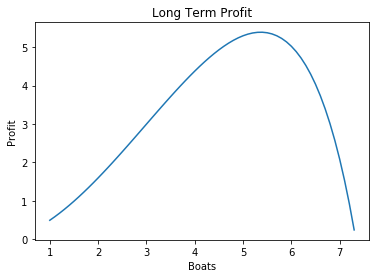

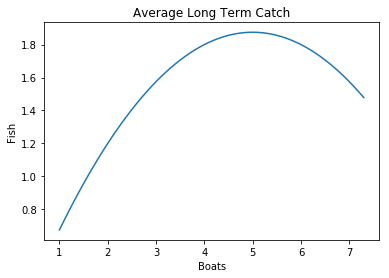

In [5]:
plt.figure()
plt.title('Long Term Profit')
plt.xlabel('Boats')
plt.ylabel('Profit')
plt.plot(b0, profit(b0), '-')
plt.show()

plt.figure()
plt.title('Average Long Term Catch')
plt.xlabel('Boats')
plt.ylabel('Fish')
plt.plot(b0, avg_catch(b0), '-')
plt.show()

## Conclusion
As seen above, maximizing long term profit results in about 5.36 boats while maximizing the average sustainable catch results in 5 boats. Since we cannot have a fraction of a boat, the result of maximizing long term profit can be adjusted to 5. The discount parameter $\delta$ can represent conditions such as inflation over time. Increasing this value will significantly decrease the maximum long term profit while also increasing the number of boats needed to maximize profit. Decrease this will have the exact opposite affect.